In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
np.random.seed(70) #for reproducibility

In [ ]:
Nu = 50
Nb = 25
tau = 1
A = np.random.normal(0, 1, (Nb, Nu))
print("A Dimensions:")
print(A.shape)

A Dimensions:
(25, 50)


In [ ]:
Q_temp = np.random.normal(0, 1, (Nu, Nu))
Q = np.dot(Q_temp.T, Q_temp) # Q is psd
print("Q Dimensions:")
print(Q.shape)

Q Dimensions:
(50, 50)


In [ ]:
q = np.random.normal(0, 1, Nu)
b = np.random.normal(0, 1, Nb)
print("q Dimensions:")
print(q.shape)
print("b Dimensions:")
print(b.shape)

q Dimensions:
(50,)
b Dimensions:
(25,)


In [ ]:
v_init = np.random.normal(0, 1, Nb)
lambd_init = np.random.rand(Nb)
print("v_init Dimensions:")
print(v_init.shape)
print("lambd_init Dimensions:")
print(lambd_init.shape)

v_init Dimensions:
(25,)
lambd_init Dimensions:
(25,)


In [ ]:
v = v_init
v_hat = v_init

lambd = lambd_init
lambd_hat = lambd_init

alpha = 1

c = 0

eta = 0.999

primal_res_accr = []
dual_res_accr = []

minpNORMAL=150
minIterNORMAL=0

iters = np.arange(0, 500)
cached_inv = np.linalg.inv((Q + tau*np.matmul(A.T, A)))
print("cached inverse Dimensions:")
print(cached_inv.shape)

cached inverse Dimensions:
(50, 50)


In [ ]:
for k in iters:
    u = np.matmul(cached_inv, np.dot(A.T, lambd_hat+tau*v_hat) - q)

    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd_hat/tau), b)

    lambd_prev = lambd
    lambd = lambd_hat + tau*(v - np.dot(A, u))

    c_prev = c
    c = (np.linalg.norm(lambd - lambd_hat, 2)**2)/tau + tau*(np.linalg.norm(v - v_hat, 2)**2)

    alpha_prev = alpha
    if c < eta*c_prev:
        alpha = (1+np.sqrt(1+4*(alpha**2)))/2

        v_hat = v + (alpha_prev-1)*(v - v_prev)/alpha
        lambd_hat = lambd + (alpha_prev-1)*(lambd-lambd_prev)/alpha
    else:
        alpha = 1
        v_hat = v_prev
        lambd_hat = lambd_prev
        c = c/eta

    primal_res_accr.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_residual = np.linalg.norm(-tau*np.matmul(A.T, v - v_prev), 2)
    if dual_residual == 0:
        dual_res_accr.append(dual_res_accr[-1])
    else:
        dual_res_accr.append(dual_residual)

lambd_opt = lambd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

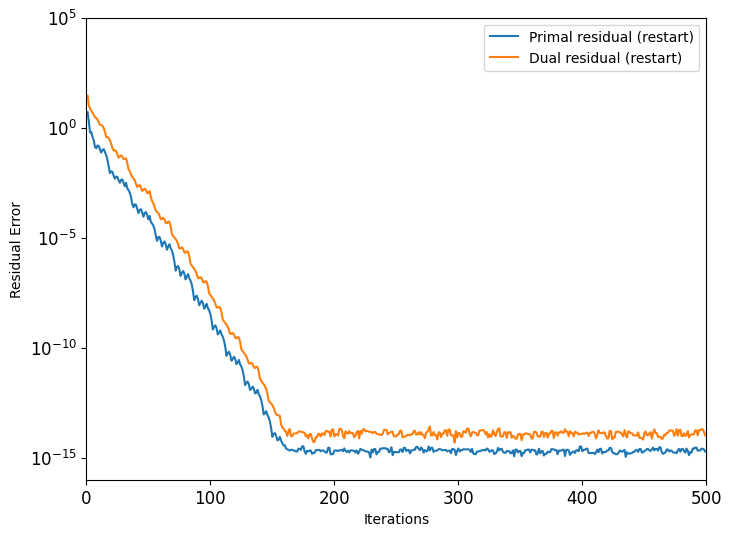

In [ ]:
from matplotlib.ticker import MaxNLocator


plt.figure(figsize=(8,6))
plt.plot(iters, primal_res_accr, label="Primal residual (restart)")
plt.plot(iters, dual_res_accr, label="Dual residual (restart)")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.xlim(0, 500)  # Set x-axis limit
plt.ylim(1e-16, 1e2)

manual_ticks = [1e-15, 1e-10, 1e-5, 1e0, 1e5]
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))
plt.yticks(manual_ticks)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--')

plt.savefig("high_dpi_graph.png", dpi=300)
files.download("high_dpi_graph.png")
plt.legend()
plt.grid()

# **SVD**

In [ ]:
U, S, Vt = np.linalg.svd(Q + tau * np.matmul(A.T, A))


r2 = 2
U_r2 = U[:, :r2]
S_r2=np.diag(1/S[:r2])
Vt_r2 = Vt[:r2, :]

r4 = 4
U_r4 = U[:, :r4]
S_r4=np.diag(1/S[:r4])
Vt_r4 = Vt[:r4, :]

r8 = 8
U_r8 = U[:, :r8]
S_r8=np.diag(1/S[:r8])
Vt_r8 = Vt[:r8, :]

r16 = 16
U_r16 = U[:, :r16]
S_r16=np.diag(1/S[:r16])
Vt_r16 = Vt[:r16, :]

r32 = 32
U_r32 = U[:, :r32]
S_r32=np.diag(1/S[:r32])
Vt_r32 = Vt[:r32, :]

r50 = 50
U_r50 = U[:, :r50]
S_r50=np.diag(1/S[:r50])
Vt_r50 = Vt[:r50, :]

print("U_r shape:")
print(U_r2.shape)
print("S_r shape:")
print(S_r2.shape)
print("Vt_r shape:")
print(Vt_r2.shape)
print()

U_r shape:
(50, 2)
S_r shape:
(2, 2)
Vt_r shape:
(2, 50)



In [ ]:
def matrix_operations(S_r, Vt_r,U_r):
  v = v_init
  v_hat = v_init

  lambd = lambd_init
  lambd_hat = lambd_init

  alpha = 1

  c = 0

  eta = 0.999

  primal_res_accr = []
  dual_res_accr = []

  minpNORMAL=150
  minIterNORMAL=0

  iters = np.arange(0, 500)

  for k in iters:
    t1=S_r@Vt_r
    t21=(lambd_hat+tau*v_hat)
    t2=(A.T@t21)-q
    temp1=np.dot(t1,t2)
    temp2=U_r@temp1
    u=temp2

    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd_hat/tau), b)

    lambd_prev = lambd
    lambd = lambd_hat + tau*(v - np.dot(A, u))

    c_prev = c
    c = (np.linalg.norm(lambd - lambd_hat, 2)**2)/tau + tau*(np.linalg.norm(v - v_hat, 2)**2)

    alpha_prev = alpha
    if c < eta*c_prev:
        alpha = (1+np.sqrt(1+4*(alpha**2)))/2

        v_hat = v + (alpha_prev-1)*(v - v_prev)/alpha
        lambd_hat = lambd + (alpha_prev-1)*(lambd-lambd_prev)/alpha
    else:
        alpha = 1
        v_hat = v_prev
        lambd_hat = lambd_prev
        c = c/eta

    primal_res_accr.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_residual = np.linalg.norm(-tau*np.matmul(A.T, v - v_prev), 2)
    if dual_residual == 0:
        dual_res_accr.append(dual_res_accr[-1])
    else:
        dual_res_accr.append(dual_residual)

  lambd_opt = lambd


  plt.figure(figsize=(8,6))
  plt.plot(iters, primal_res_accr, label="Primal residual (restart)")
  plt.plot(iters, dual_res_accr, label="Dual residual (restart)")
  plt.yscale("log")
  plt.xlabel("Iterations")
  plt.ylabel("Residual Error")

  manual_ticks = [1e-15, 1e-10, 1e-5, 1e0, 1e5]
  plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))
  plt.yticks(manual_ticks)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend(fontsize=12)
  plt.grid(visible=True, which='major', linestyle='--')

  plt.xlim(0, 500)  # Set x-axis limit
  plt.ylim(1e-16, 1e2)
  plt.savefig("high_dpi_graph.png", dpi=300)
  files.download("high_dpi_graph.png")
  plt.legend()
  plt.grid()
  return

# **r=2**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

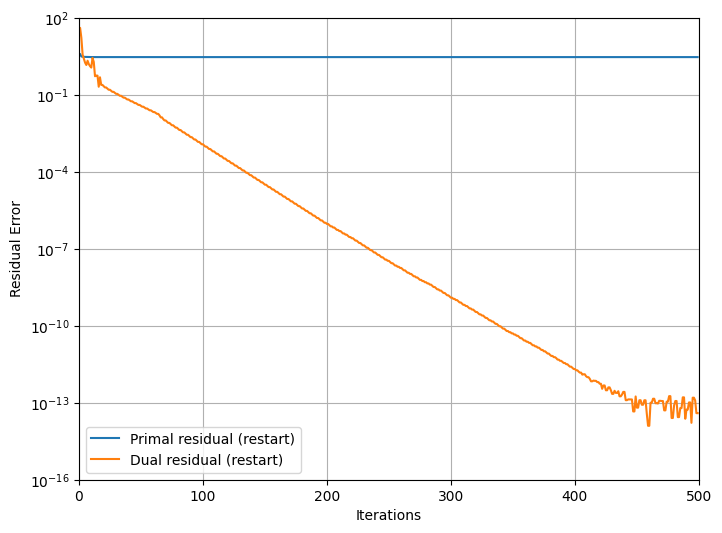

In [ ]:
matrix_operations(S_r2, Vt_r2,U_r2)

# **r=4**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

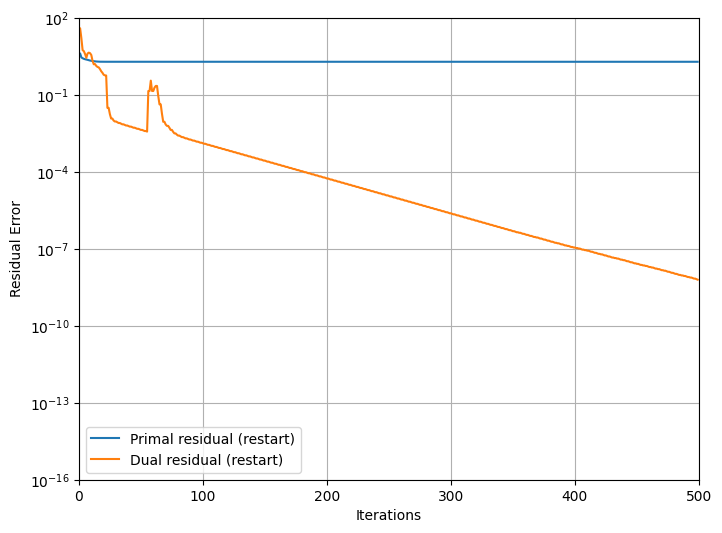

In [ ]:
matrix_operations(S_r4, Vt_r4,U_r4)

# **r=8**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

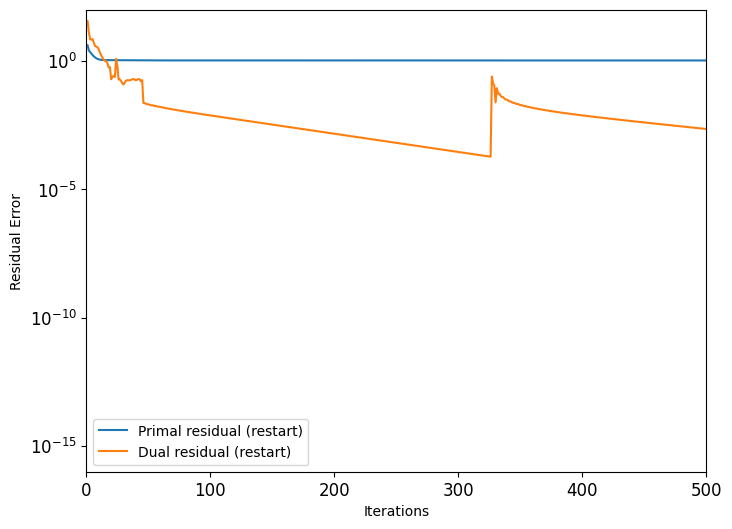

In [ ]:
matrix_operations(S_r8, Vt_r8,U_r8)

# **r=16**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

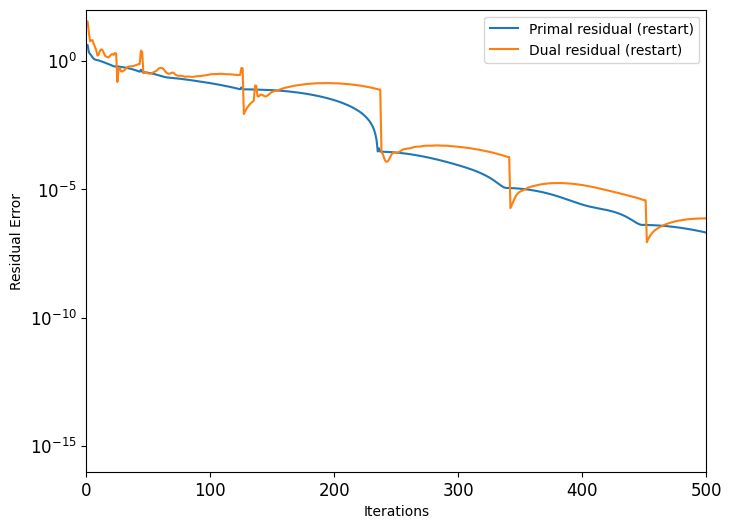

In [ ]:
matrix_operations(S_r16, Vt_r16,U_r16)

# **r=32**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

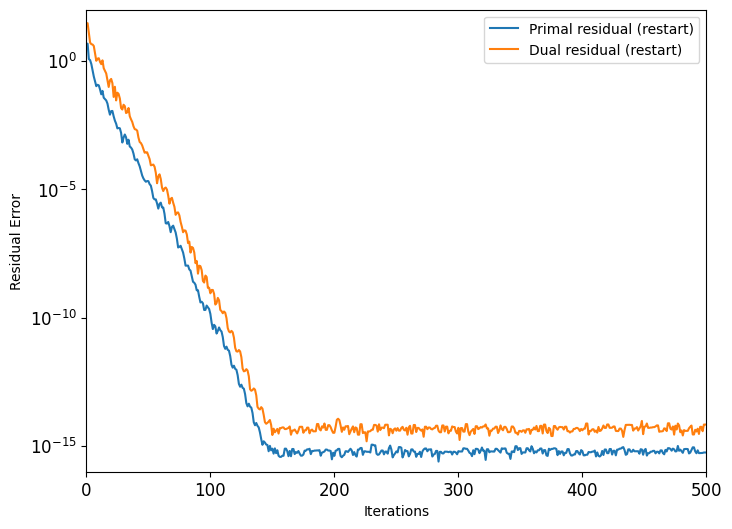

In [ ]:
matrix_operations(S_r32, Vt_r32,U_r32)

# **r=50**

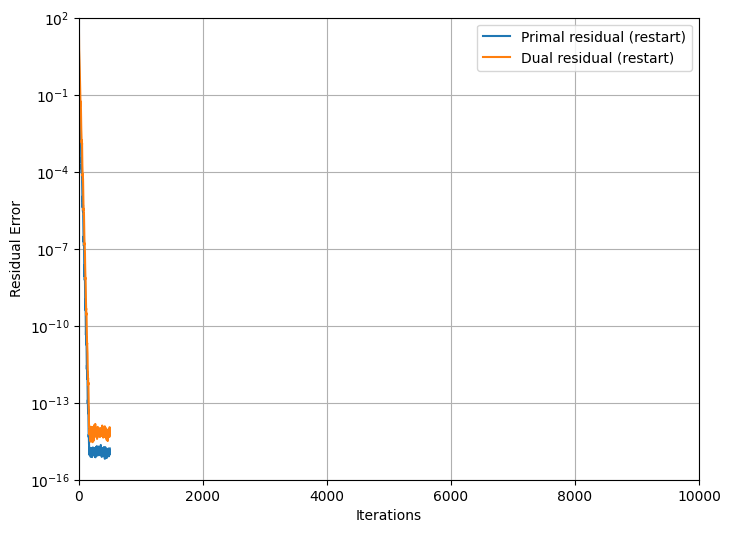

In [ ]:
matrix_operations(S_r50, Vt_r50,U_r50)

In [ ]:
matrix_operations(Ss, Vt,U)

NameError: name 'Ss' is not defined